# A

In [6]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# B

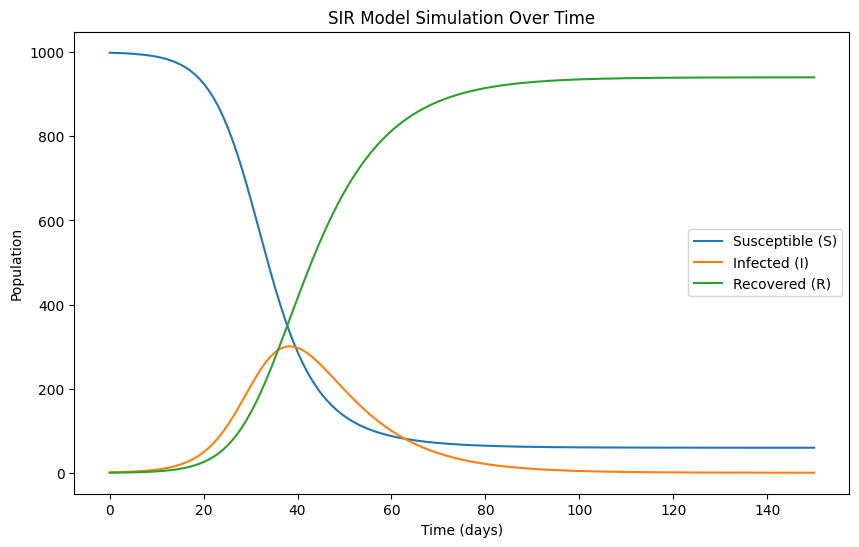

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 1000         
beta = 0.3 / 1000
gamma = 0.1      
S0 = 999         
I0 = 1           
R0 = 0           
initial_conditions = [S0, I0, R0]

t = np.linspace(0, 150, 150)

solution = odeint(sir_model, initial_conditions, t, args=(beta, gamma))
S, I, R = solution.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (S)')
plt.plot(t, I, label='Infected (I)')
plt.plot(t, R, label='Recovered (R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SIR Model Simulation Over Time')
plt.show()

# C

## i
In the simulation results, the number of infected individuals \( I(t) \) reaches its maximum around day 40.

At this point, the curves for the susceptible population (S) and infected population (I) intersect, indicating the peak of infections. This peak is mainly influenced two factors:
Transmission rate (β), A higher β means the infection spreads faster, causing the peak to occur earlier; 
Recovery rate (γ), A higher γ means infected individuals recover more quickly, which shortens the duration of the infection peak.
The infection peak shows that the number of susceptible individuals has significantly decreased, and as the sources of infection gradually diminish, the number of infected individuals begins to decline.


## ii
In this case, $R_0 = \frac{0.3 \times 10^{-3}}{0.1} = 3$.

$R_0$ represents the average number of secondary infections caused by a single infected individual in a fully susceptible population. When $R_0 > 1$, the disease spreads because each infected person leads to more secondary infections; when $R_0 < 1$, the infection gradually declines. A higher $R_0$ results in a rapid increase in infections, making the infection peak more pronounced. By controlling $\beta$ (such as through quarantine measures) or increasing $\gamma$ (speeding up recovery), $R_0$ can be effectively reduced, thereby controlling the spread of the pandemic.


## iii
**Susceptible Population (S)**: Initially the largest group, it gradually decreases as the infection spreads and eventually stabilizes.

**Infected Population (I)**: Slowly increases at first, reaches a peak, and then rapidly decreases, ultimately approaching zero. This shows that the infection spread gradually weakens until there are virtually no infected individuals.

**Recovered Population (R)**: Increases over time and eventually stabilizes at a high level. This shows the majority of the population has recovered.

The interactions among these compartments illustrate the spread and eventual containment of the infection. After the infection peak, as the number of infected individuals decreases and the recovered population increases, the pandemic is gradually brought under control. Eventually, the susceptible population no longer decreases significantly.


# D

## i

In [8]:

def seir_model(y, t, beta, gamma, sigma, mu, N):
    S, E, I, R = y
    dS_dt = mu * N - beta * S * I - mu * S
    dE_dt = beta * S * I - (sigma + mu) * E
    dI_dt = sigma * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]


# ii

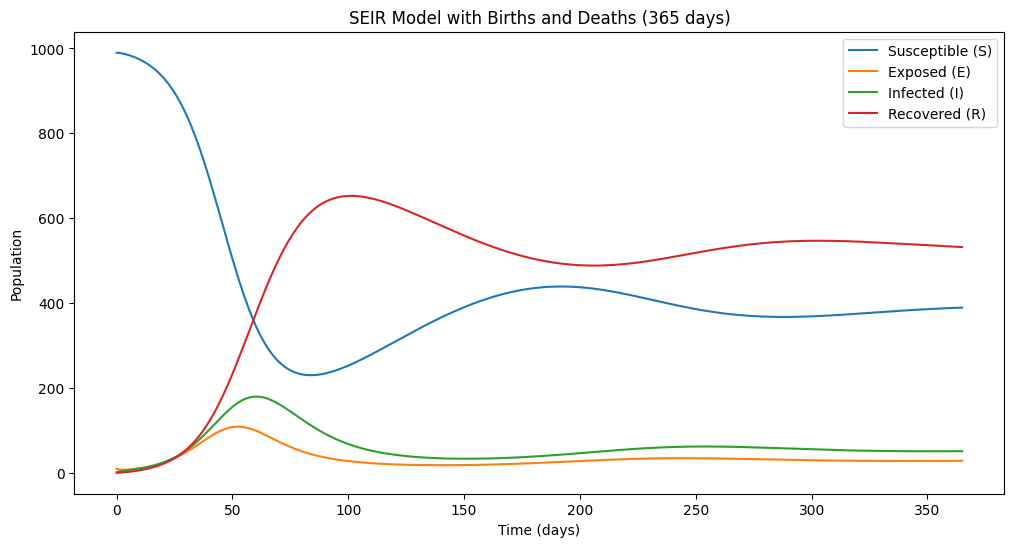

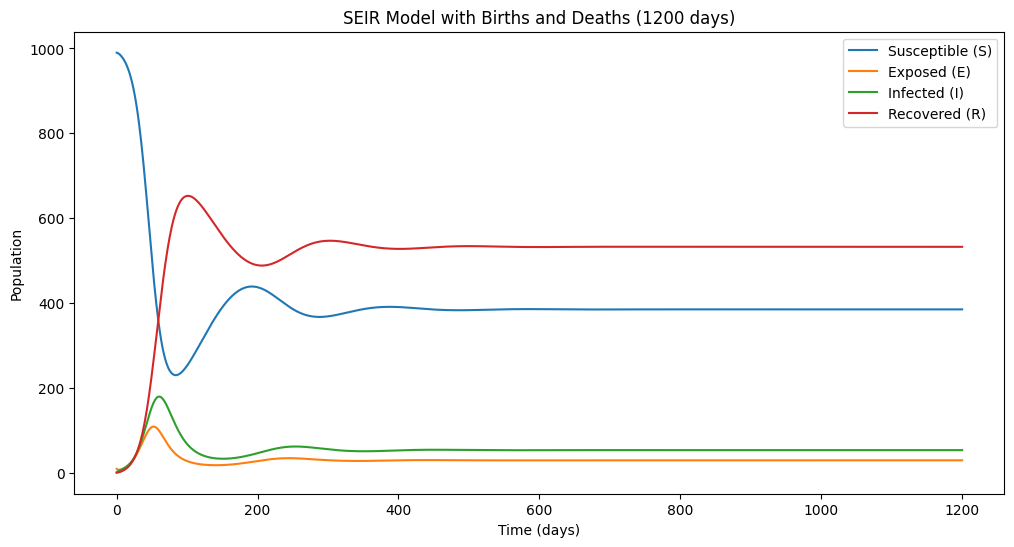

In [9]:
N = 1000           
beta = 0.3 / 1000  
gamma = 0.1        
sigma = 0.2        
mu = 0.01          

S0 = 990          
E0 = 9            
I0 = 1            
R0 = 0            
initial_conditions = [S0, E0, I0, R0]

t1 = np.linspace(0, 365, 365)
t2 = np.linspace(0, 1200, 1200)

solution_365 = odeint(seir_model, initial_conditions, t1, args=(beta, gamma, sigma, mu, N))
solution_1200 = odeint(seir_model, initial_conditions, t2, args=(beta, gamma, sigma, mu, N))

S_365, E_365, I_365, R_365 = solution_365.T
S_1200, E_1200, I_1200, R_1200 = solution_1200.T

plt.figure(figsize=(12, 6))
plt.plot(t1, S_365, label='Susceptible (S)')
plt.plot(t1, E_365, label='Exposed (E)')
plt.plot(t1, I_365, label='Infected (I)')
plt.plot(t1, R_365, label='Recovered (R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SEIR Model with Births and Deaths (365 days)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t2, S_1200, label='Susceptible (S)')
plt.plot(t2, E_1200, label='Exposed (E)')
plt.plot(t2, I_1200, label='Infected (I)')
plt.plot(t2, R_1200, label='Recovered (R)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SEIR Model with Births and Deaths (1200 days)')
plt.legend()
plt.show()

## iii
The infection count shows wave-like patterns. Although susceptible individuals recover and reduce the susceptible population, a non-zero birth rate is replenishing the susceptible population over time. A new wave will arise one day. Each wave diminishes in intensity over time, suggesting a trend toward an endemic state with stable, low-level infections.

## iv
The exposed compartment (E) adds a delay from infection to symptoms, smoothing infection peaks and spreading them out over time. The birth/death rate (μ) replenishes the susceptible population and prevents the infection from fully dying out, enabling recurrent waves and supporting a long-term endemic state with stable, low-level infections.

# E

# i

In [ ]:
beta_values = np.linspace(0.1e-3, 0.5e-3, 5)
gamma_values = np.linspace(0.05, 0.2, 5)

t = np.linspace(0, 365, 365)

peak_infections = np.zeros((len(beta_values), len(gamma_values)))
total_infections = np.zeros((len(beta_values), len(gamma_values)))

for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):

        solution = odeint(seir_model, initial_conditions, t, args=(beta, gamma, sigma, mu, N))
        S, E, I, R = solution.T
        
        peak_infections[i, j] = max(I)
        total_infections[i, j] = np.trapezoid(I, t)

## ii

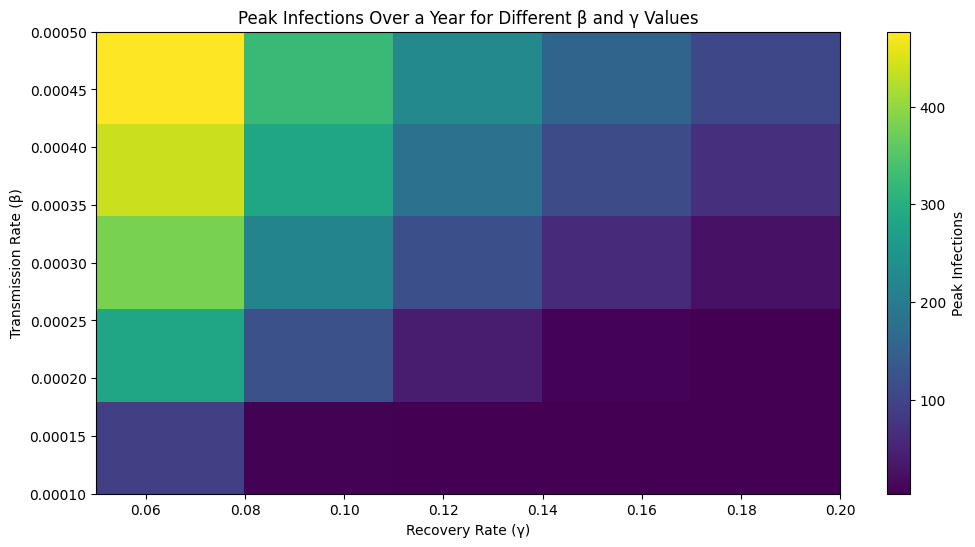

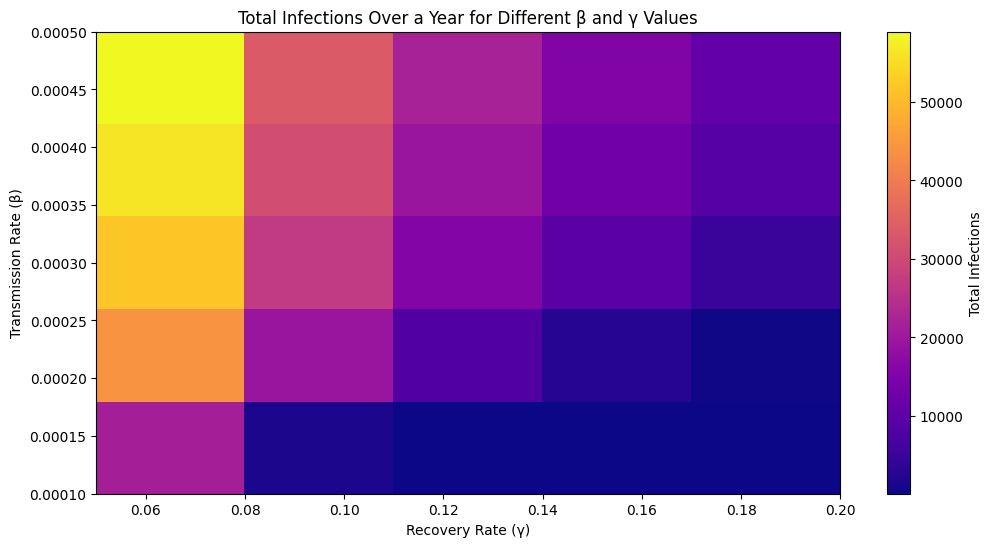

In [15]:
plt.figure(figsize=(12, 6))
plt.imshow(peak_infections, extent=[gamma_values.min(), gamma_values.max(), beta_values.min(), beta_values.max()], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Peak Infections')
plt.xlabel('Recovery Rate (γ)')
plt.ylabel('Transmission Rate (β)')
plt.title('Peak Infections Over a Year for Different β and γ Values')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(total_infections, extent=[gamma_values.min(), gamma_values.max(), beta_values.min(), beta_values.max()], origin='lower', aspect='auto', cmap='plasma')
plt.colorbar(label='Total Infections')
plt.xlabel('Recovery Rate (γ)')
plt.ylabel('Transmission Rate (β)')
plt.title('Total Infections Over a Year for Different β and γ Values')
plt.show()

## iii

Higher values of β result in greater peak infections and a higher total number of infections. This indicates that when transmission is easier (due to high contact rates), the pandemic spreads more rapidly and affects a larger portion of the population.
Therefore, reducing β through social distancing measures—such as limiting physical contact, mask-wearing—can significantly reduce both peak and total infections.

Higher values of γ lower both peak and total infections, as infected individuals spend less time spreading the disease. 
Therefore, Medical interventions that increase γ can reduce the infection duration, which lower both peak and total infections. This highlights the importance of robust healthcare and medical treatment options in pandemic control.